# CBSA Predictive model
1) Polynomial Regression

2) Random Forest

3) Decision Tree

Using: Sk-learn package

Precedures:

1) Data cleaning: extract useful data from dataset, saved those data as csv. Import those data.csv to kernal

2) Training-validation-testing set split

3) Evaluate the accuracy of different model

4) Train predictive models

5) Data visualization

***data cleaning 

first choose the model, then cross validation

third party information 

final -> time(yyyy-mm-dd)

-> can choose diff y

organize via config -> switch on diff steps -> pipline调试

分工 -> data cleaning, train model -> research -> write report 



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [6]:
data=pd.read_csv('經濟_data.csv')
data


,date,year,month,day,網紅博客,網民,匿名,媒體,機構及社群,政界人士,...,pos_count,neg_count,neu_count,emo_score,correlation_keyword0,correlation_value0,correlation_keyword1,correlation_value1,correlation_keyword2,correlation_value2
0,2020-01-01,2020,1,1,0,0,0,0,0,0,...,0,0,0,0.000000,NaN,0,NaN,0,NaN,0
1,2020-01-08,2020,1,8,0,0,0,0,0,0,...,0,0,0,0.000000,NaN,0,NaN,0,NaN,0
2,2020-01-15,2020,1,15,0,0,0,0,0,0,...,0,0,0,0.000000,NaN,0,NaN,0,NaN,0
3,2020-01-22,2020,1,22,0,0,0,0,0,0,...,0,0,0,0.000000,NaN,0,NaN,0,NaN,0
4,2020-01-29,2020,1,29,0,0,0,0,0,0,...,0,0,0,0.000000,NaN,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2021-07-14,2021,7,14,7,7,7,11,1,5,...,34,2,2,0.888889,香港,8,發展,8,中國,5
81,2021-07-21,2021,7,21,1,3,11,13,7,0,...,35,0,0,1.000000,香港,6,消費券,4,增長,4
82,2021-07-28,2021,7,28,1,5,7,5,5,3,...,25,2,0,0.851852,香港,7,英國,4,清零,2
83,2021-08-04,2021,8,4,1,2,0,1,2,0,...,6,0,0,1.000000,香港,2,大灣區,2,疫情,1


In [7]:
data.describe()

,year,month,day,網紅博客,網民,匿名,媒體,機構及社群,政界人士,企業品牌,...,Facebook香港,publisher_total,keywords_total,pos_count,neg_count,neu_count,emo_score,correlation_value0,correlation_value1,correlation_value2
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,2020.376471,5.670588,15.494118,5.776471,21.270588,22.011765,21.011765,8.952941,3.376471,0.917647,...,45.800000,83.835294,76.129412,30.576471,2.070588,0.811765,0.798697,19.564706,12.564706,9.270588
std,0.487376,3.256452,8.889030,8.869928,23.360726,17.026935,14.218946,7.464050,3.345133,0.978480,...,39.765024,54.445221,40.709127,10.932016,1.824361,1.029264,0.261079,18.800612,11.873788,6.795286
min,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,3.000000,8.000000,2.000000,4.000000,10.000000,11.000000,3.000000,1.000000,0.000000,...,18.000000,42.000000,47.000000,32.000000,1.000000,0.000000,0.789474,8.000000,5.000000,5.000000
50%,2020.000000,5.000000,15.000000,4.000000,9.000000,21.000000,19.000000,8.000000,3.000000,1.000000,...,33.000000,81.000000,77.000000,34.000000,2.000000,0.000000,0.888889,13.000000,10.000000,8.000000
75%,2021.000000,8.000000,23.000000,8.000000,32.000000,30.000000,30.000000,13.000000,5.000000,1.000000,...,69.000000,123.000000,103.000000,36.000000,3.000000,1.000000,0.945946,28.000000,17.000000,12.000000
max,2021.000000,12.000000,31.000000,76.000000,94.000000,90.000000,62.000000,36.000000,20.000000,4.000000,...,165.000000,205.000000,165.000000,39.000000,9.000000,4.000000,1.000000,88.000000,84.000000,33.000000


In [71]:
corr = data.corr()

corr.style.background_gradient(cmap='coolwarm')

,year,month,day,網紅博客,網民,匿名,媒體,機構及社群,政界人士,企業品牌,演藝明星,商界名人,author_total,Facebook - 群組 或專頁,香港高登,香港01,LIHKG,香港討論區-discuss.com.hk,雅虎(香港),親子王國,香港討論區-uwants.com,Facebook香港,publisher_total,keywords_total,pos_count,neg_count,neu_count,emo_score,correlation_value0,correlation_value1,correlation_value2
year,1.000000,-0.333480,0.017005,-0.266700,-0.547544,0.085534,-0.498828,-0.309234,-0.270519,-0.183849,-0.119339,-0.069599,-0.445826,-0.203480,-0.087370,0.100124,-0.390519,-0.417143,0.063176,-0.215511,-0.249342,-0.420526,-0.445826,-0.429698,-0.027811,-0.083799,0.048022,0.170579,-0.397655,-0.368376,-0.390584
month,-0.333480,1.000000,0.002811,0.020089,0.298362,-0.261653,0.213224,0.094862,-0.005966,0.051163,0.042232,-0.182875,0.116188,-0.244168,0.111265,-0.211093,0.046464,0.313360,-0.245079,0.105607,0.128282,0.314450,0.116188,0.121019,0.358532,-0.174382,-0.008065,0.430297,0.270052,0.216384,0.216579
day,0.017005,0.002811,1.000000,0.018177,0.003878,-0.044322,0.003438,0.088454,0.032505,-0.241635,0.130130,-0.178362,-0.000592,-0.003250,-0.028821,-0.171124,-0.136205,0.031539,0.035161,-0.173050,-0.054984,0.027328,-0.000592,0.009000,0.143064,-0.198181,-0.101615,0.171202,0.024810,-0.037077,-0.001057
網紅博客,-0.266700,0.020089,0.018177,1.000000,0.272279,0.159087,0.378909,0.632249,0.411316,0.368204,0.033032,0.075451,0.548292,0.074530,0.074540,0.154407,0.283800,0.094367,0.133585,0.319343,0.118630,0.596877,0.548292,0.466859,0.232157,0.151066,0.227446,0.171490,0.543390,0.750632,0.375300
網民,-0.547544,0.298362,0.003878,0.272279,1.000000,0.092683,0.716179,0.511520,0.520454,0.210874,0.168862,0.128285,0.798048,0.144186,0.532865,0.210917,0.597783,0.838384,0.009106,0.197180,0.384097,0.729257,0.798048,0.690242,0.377903,0.192287,0.233363,0.250625,0.831119,0.630431,0.785846
匿名,0.085534,-0.261653,-0.044322,0.159087,0.092683,1.000000,0.412650,0.298818,0.315738,0.187985,0.007949,0.360751,0.555331,0.369918,0.248927,0.798526,0.368816,0.053668,0.940212,0.084273,0.141266,0.095442,0.555331,0.564964,0.458403,0.429971,0.308527,0.290245,0.197638,0.276897,0.436641
媒體,-0.498828,0.213224,0.003438,0.378909,0.716179,0.412650,1.000000,0.650482,0.609357,0.373994,0.152496,0.242664,0.896896,0.375733,0.388074,0.447568,0.611444,0.588210,0.320189,0.113068,0.264039,0.675044,0.896896,0.893429,0.576960,0.369403,0.252320,0.385149,0.661556,0.580134,0.754258
機構及社群,-0.309234,0.094862,0.088454,0.632249,0.511520,0.298818,0.650482,1.000000,0.598620,0.263527,0.045079,0.176961,0.767263,0.064815,0.307160,0.352943,0.447183,0.356816,0.216675,0.172496,0.328385,0.760119,0.767263,0.729613,0.461225,0.220558,0.361440,0.336436,0.643918,0.581528,0.504888
政界人士,-0.270519,-0.005966,0.032505,0.411316,0.520454,0.315738,0.609357,0.598620,1.000000,0.376932,-0.058824,0.249320,0.701911,0.093792,0.228110,0.318545,0.442244,0.280074,0.259802,0.261323,0.478814,0.663563,0.701911,0.683445,0.351114,0.331119,0.373507,0.222962,0.531901,0.442668,0.569987
企業品牌,-0.183849,0.051163,-0.241635,0.368204,0.210874,0.187985,0.373994,0.263527,0.376932,1.000000,-0.023888,0.182356,0.386783,0.071455,0.081980,0.222820,0.193159,0.060418,0.134543,0.271825,0.202336,0.375599,0.386783,0.435121,0.336145,0.243378,0.008066,0.237874,0.282769,0.349361,0.264796


In [32]:
author_count = data["網紅博客"].sum(),data['網民'].sum(),data['匿名'].sum(),data['媒體'].sum(),data['機構及社群'].sum(),data['政界人士'].sum(),data['企業品牌'].sum(),data['演藝明星'].sum(),data['商界名人'].sum()

author_count1 = np.array(list(author_count))

(9,)

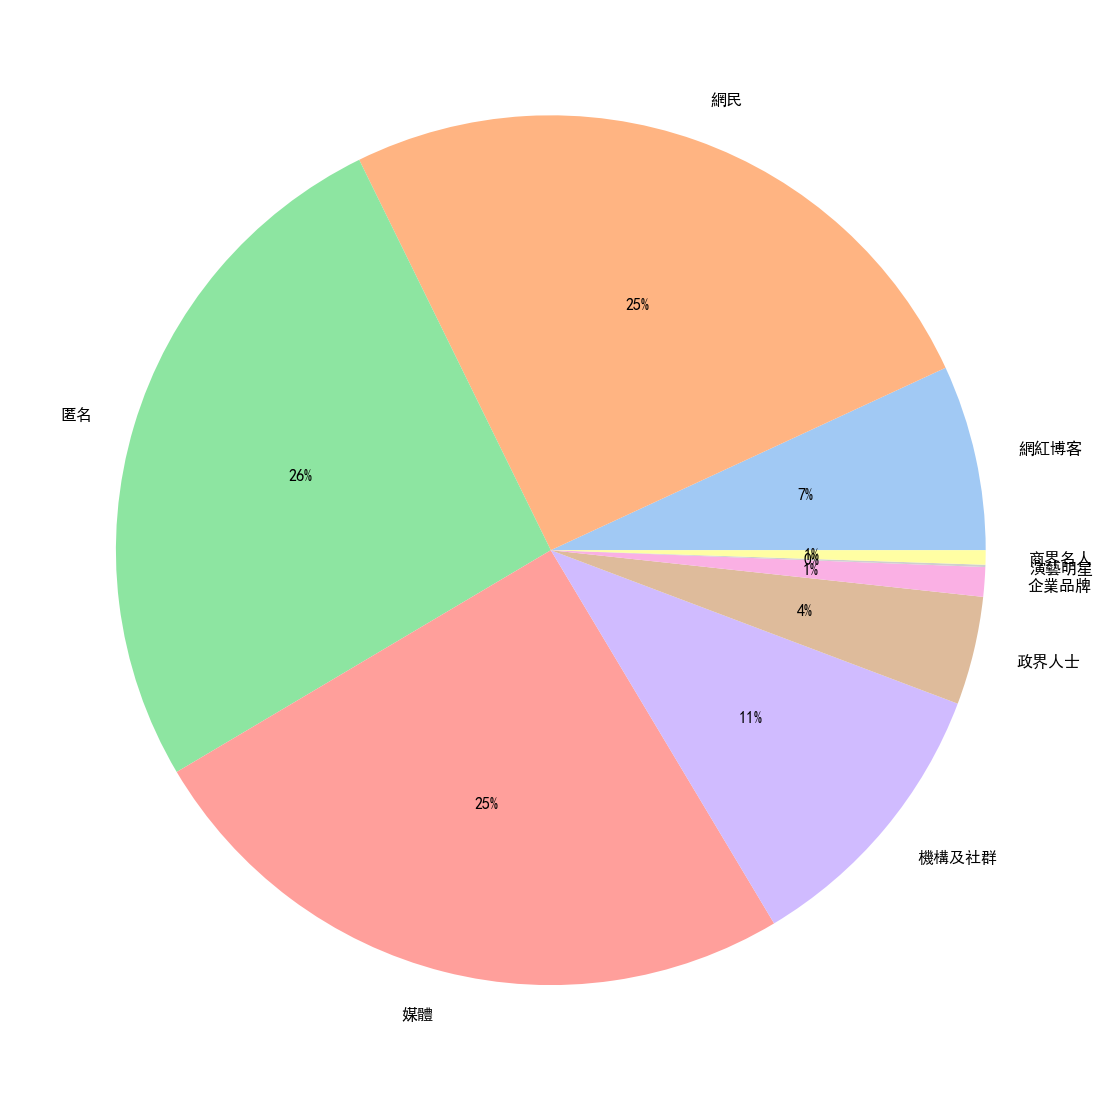

In [34]:
font = {'family' : 'SimHei',
        'weight' : 'bold',
        'size'   : '16'}
plt.rc('font', **font)               # 步驟一（設置字體的更多屬性）
plt.rc('axes', unicode_minus=False)

from matplotlib.font_manager import FontProperties  # 導入FontProperties
font = FontProperties(fname="SimHei.ttf", size=14)  # 設置字體

by_author = author_count1
labels=['網紅博客','網民','匿名','媒體','機構及社群','政界人士','企業品牌','演藝明星','商界名人']
colors = sns.color_palette('pastel')

plt.figure(figsize=(20,20))
plt.pie(by_author,labels=labels,colors=colors,autopct='%.0f%%')

plt.show()

In [48]:
publisher_count = data['Facebook - 群組 或專頁'].sum(),data['香港高登'].sum(),data['香港01'].sum(),data['LIHKG'].sum(),data['香港討論區-discuss.com.hk'].sum(),data['雅虎(香港)'].sum(),data['親子王國'].sum(),data['香港討論區-uwants.com'].sum(),data['Facebook香港'].sum()
publisher_count1 = np.array(list(publisher_count))

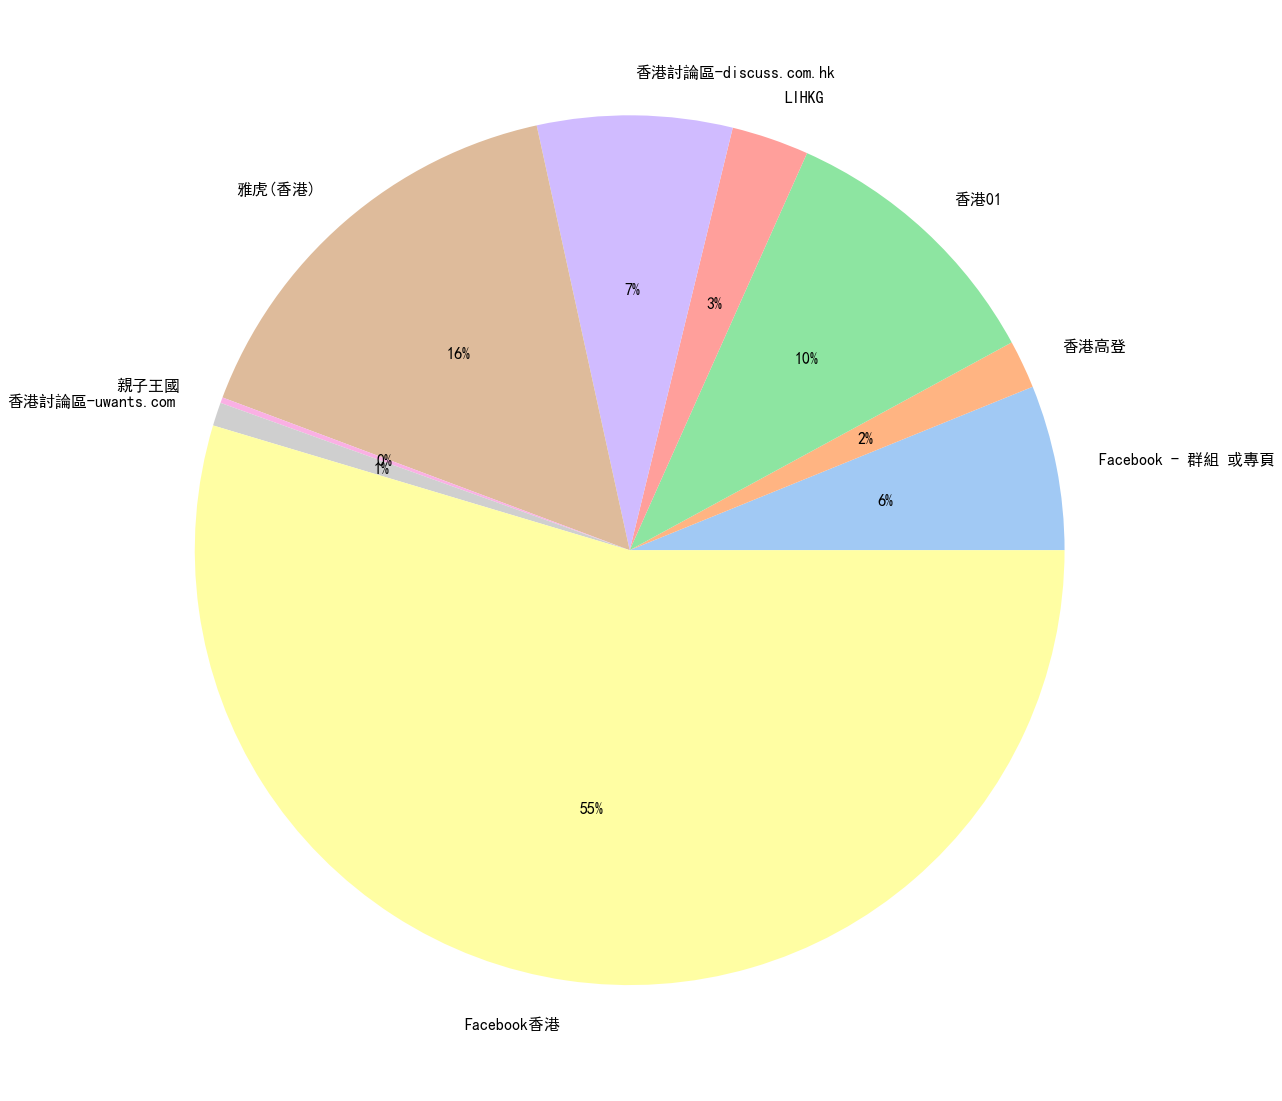

In [63]:
by_publisher= publisher_count1

labels= ['Facebook - 群組 或專頁',
'香港高登',
'香港01',
'LIHKG',
'香港討論區-discuss.com.hk',
'雅虎(香港)',
'親子王國',
'香港討論區-uwants.com',
'Facebook香港'
]

colors = sns.color_palette('pastel')

plt.figure(figsize=(20,20))
plt.pie(by_publisher,labels=labels,colors=colors,autopct='%.0f%%')

plt.show()

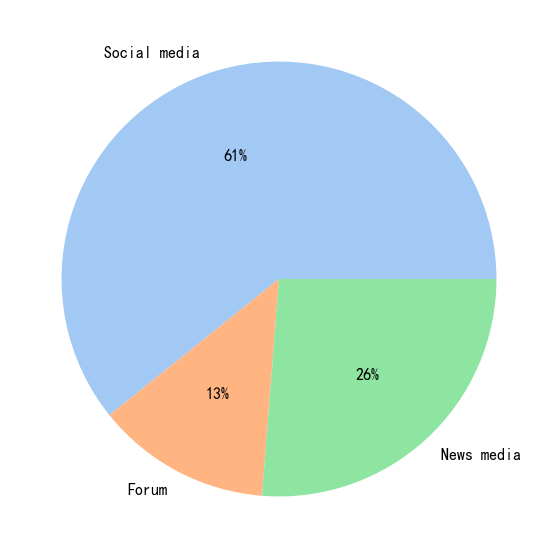

In [65]:
#further classify the publisher to major type
Social_media = data['Facebook - 群組 或專頁']+data['Facebook香港']
Forum = data['香港高登']+data['LIHKG']+data['香港討論區-discuss.com.hk']+data['親子王國']+data['香港討論區-uwants.com']
News_media = data['香港01']+data['雅虎(香港)']

publisher_count_r= np.array([Social_media.sum(),Forum.sum(),News_media.sum()])
by_publisher_r = publisher_count_r
labels = ['Social media','Forum','News media']

colors = sns.color_palette('pastel')

plt.figure(figsize=(10,10))
plt.pie(by_publisher_r,labels=labels,colors=colors,autopct='%.0f%%')

plt.show()

In [249]:
#Establish the model
X = np.array(data.loc[:,'keywords_total']).reshape(-1,1)
y = np.array(data.loc[:,'Facebook香港']).reshape(-1,1)

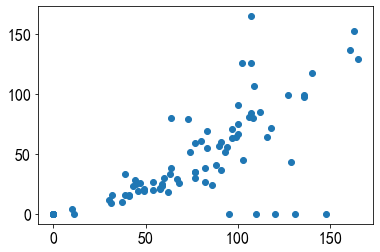

In [251]:
plt.scatter(X,y)

In [289]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state = 0)

In [290]:
#Cross validation
cv = KFold(n_splits=2, random_state=1, shuffle=True)
#Build Model
model = PolynomialRegression(degree=2)
#Evaluate model using LOOCV
scores = cross_val_score(model, X, y,cv=5, n_jobs=-1)
#Review MSE
np.mean(scores)

-0.24597913715328446

In [291]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=2)
poly_reg.fit(X_train, y_train)

y_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

681.862022977766

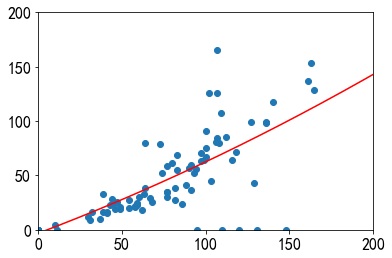

In [270]:
def plot_model(model):
    X_plot = np.linspace(0, 200, 200).reshape(200, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(X, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([0,200, 0, 200])
    plt.show()

plot_model(poly_reg)

In [271]:
#Lasso Regression
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

In [272]:
lasso1_reg = LassoRegression(2,1)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

760.0922550389489

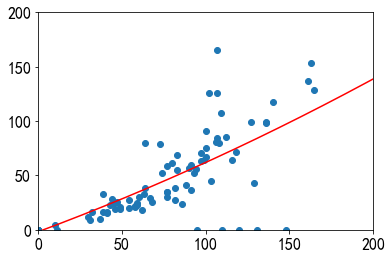

In [273]:
plot_model(lasso1_reg)

In [274]:
#Ridge Regression
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [275]:
ridge1_reg = RidgeRegression(3, 1)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

757.9847330293354

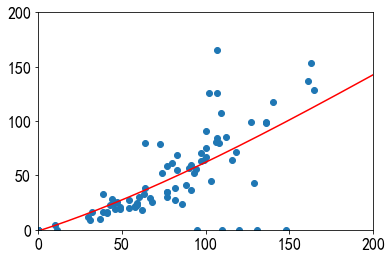

In [276]:
plot_model(ridge1_reg)